In [45]:
import gdal 
import matplotlib.pyplot as plt
import matplotlib.transforms as mtransforms
import numpy as np 
from scipy import ndimage
gdal.UseExceptions()

In [2]:
ds = gdal.Open('OSBS_002_camera.tif')

In [8]:
ds.GetMetadata()
ds.GetRasterBand(2)

<osgeo.gdal.Band; proxy of <Swig Object of type 'GDALRasterBandShadow *' at 0x7f076d746900> >

In [64]:
img_array = ds.ReadAsArray()

In [10]:
img_array.T.shape

(320, 320, 3)

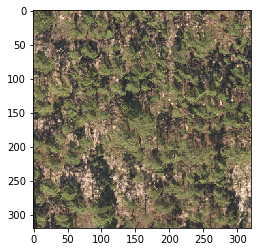

In [91]:
# RGB Image Bands Viewer 
for 
plt.imshow((img_array.T/img_array.max()))


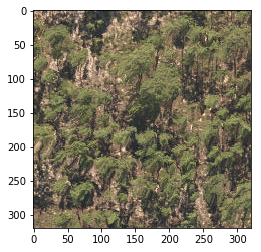

In [90]:
plt.imshow((img_array.T/img_array.max())).set_transform(mtransforms.Affine2D().rotate_deg(0))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


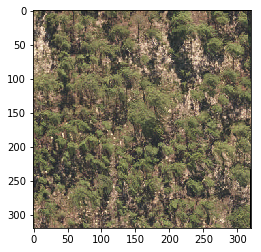

In [79]:
plt.imshow(ndimage.rotate(img_array.T/img_array.max(), 180))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


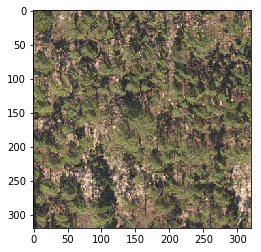

In [72]:
plt.imshow(ndimage.rotate(img_array.T/img_array.max(), 360))